In [56]:
import sys
sys.path.append("../")
from cloude import read_mueller_matrix_from_file, reshape_matrix_into_dataframe, cloude_decomposition
from scipy.signal import savgol_filter

In [57]:
MM = read_mueller_matrix_from_file('Al2O3_smooth_back_MM.txt')
MM = MM.apply(lambda x: savgol_filter(x, 51, 2))
reshaped_mm = MM.values.reshape(-1, 4, 4)
MM_cloude = cloude_decomposition(reshaped_mm, ev_mask=[1, 0, 0, 0])
Mdf_cloude = reshape_matrix_into_dataframe(MM, MM_cloude)

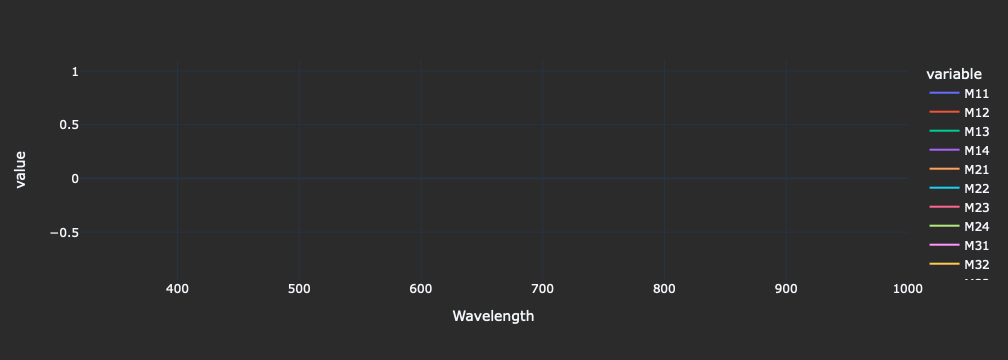

In [58]:
MM.plot()

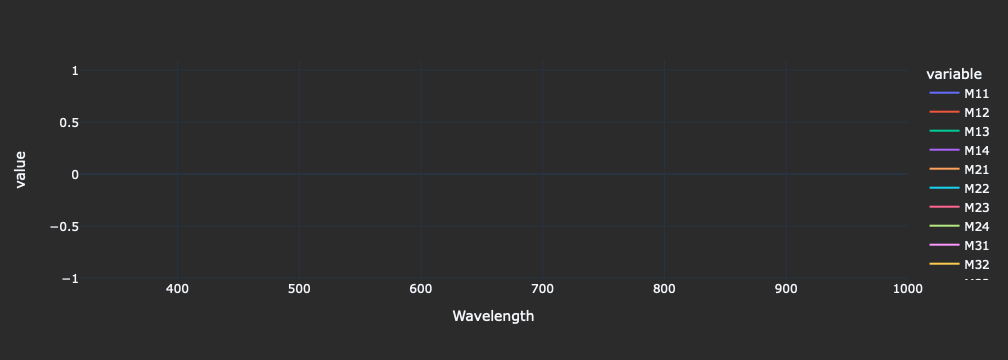

In [59]:
Mdf_cloude.plot()

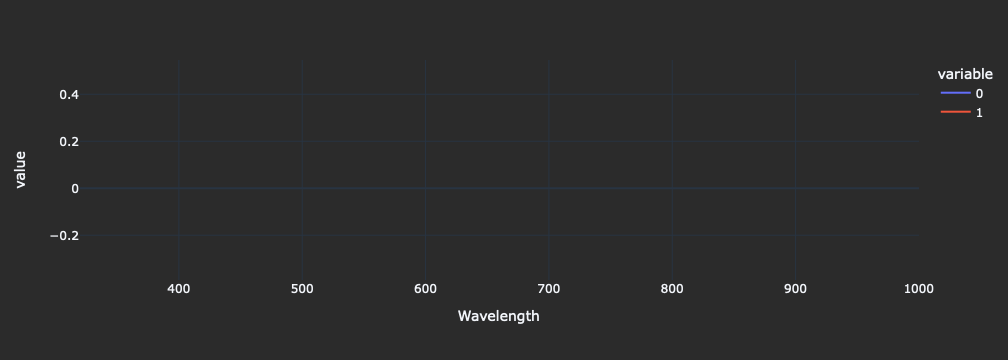

In [60]:
N = -Mdf_cloude.loc[:,['M12', 'M21']].mean(axis=1)
C = Mdf_cloude.loc[:,'M33']
S = Mdf_cloude.loc[:,'M34']

Ψ = (C + 1j * S / (1 + N)).apply(lambda x: np.arctan(np.abs(x)))
Δ = (C + 1j * S / (1 + N)).apply(lambda x: np.angle(x))

pd.concat([Ψ, Δ], axis=1).plot()

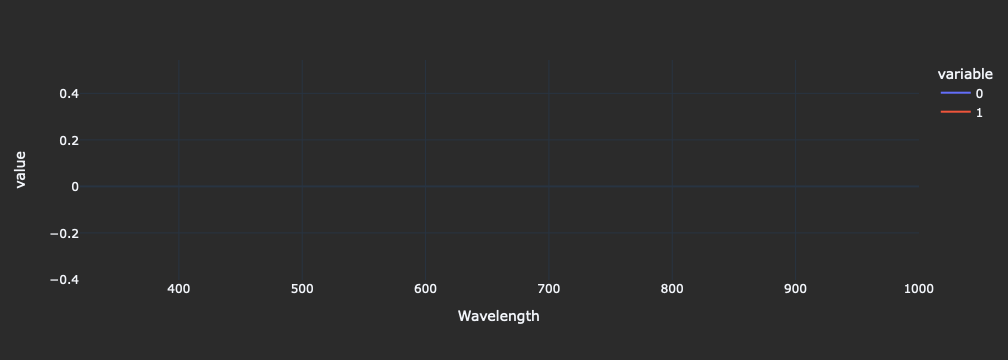

In [61]:
N = -MM.loc[:,['M12', 'M21']].mean(axis=1)
C = MM.loc[:,'M33']
S = (MM.loc[:,'M34'] - MM.loc[:,'M43'])/2

Ψ = (C + 1j * S / (1 + N)).apply(lambda x: np.arctan(np.abs(x)))
Δ = (C + 1j * S / (1 + N)).apply(lambda x: np.angle(x))

pd.concat([Ψ, Δ], axis=1).plot()